### Importing Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset 

In [2]:
df=pd.read_csv('C:\\Users\\Vijay\\Downloads\\Bribe data.csv',parse_dates=["Date"])

In [3]:
df.head(5)

,Title,Date,Location,Department,Views,Amount(INR)
0,They said it is registration fee for birth cer...,2020-10-14,"Bangalore,Karnataka","Births, Family and Care",1225,400
1,Paid bribe for not having insurance during pan...,2020-10-13,"Bangalore,Karnataka",Vehicle Insurance,1158,350
2,Forced to pay bribe at KR Puram RTO,2020-10-13,"Bangalore,Karnataka",Driving and Transport Business,1249,100
3,Forced to pay 100 rupees bribe for LL test,2020-10-13,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100
4,Misusing of power and traping people in false ...,2020-10-13,"Siwan,Bihar",FIR and Complaints,1068,15000


### Performing EDA on the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 6 columns):
Title          3473 non-null object
Date           3473 non-null datetime64[ns]
Location       3473 non-null object
Department     3429 non-null object
Views          3473 non-null int64
Amount(INR)    3473 non-null int64
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 162.9+ KB


In [5]:
r,c=df.shape
print('The dataset has ',r,' rows and ',c,' columns.' )

The dataset has  3473  rows and  6  columns.


In [6]:
df.describe()

,Views,Amount(INR)
count,3473.000000,3.473000e+03
mean,3379.405701,3.331083e+04
std,1540.854884,1.508203e+05
min,463.000000,1.000000e+00
25%,2081.000000,3.300000e+02
50%,3272.000000,1.200000e+03
75%,4522.000000,8.000000e+03
max,20450.000000,2.185000e+06


In [7]:
# Inculding the object datatype aswell
df.describe(include=object)

,Title,Location,Department
count,3473,3473,3429
unique,3282,510,367
top,Passport verification,"Bangalore,Karnataka",Others
freq,10,769,472


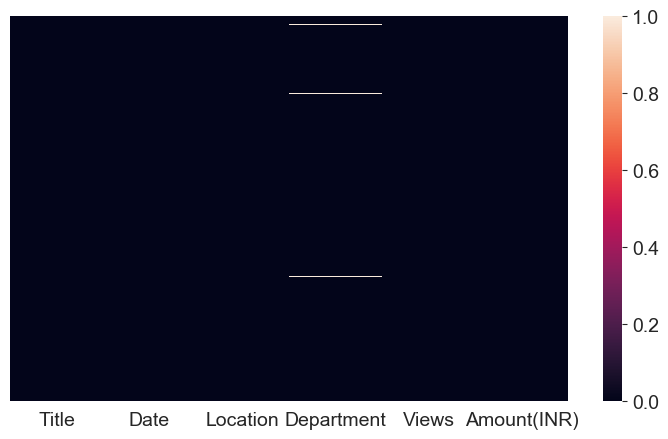

In [8]:
## Using HeatMap for better Visualization 
sns.heatmap(df.isnull(), yticklabels=False)

In [9]:
df.isnull().sum()

Title           0
Date            0
Location        0
Department     44
Views           0
Amount(INR)     0
dtype: int64

In [10]:
## Checking for null in "Department" Column 
df[df['Department'].isnull()].head()

,Title,Date,Location,Department,Views,Amount(INR)
34,I paid 500rs bribe for passport police verific...,2020-02-10,"NewDelhi,Delhi",NaN,1451,500
38,For clearing papers in survey for SRA,2020-09-25,"Mumbai,Maharashtra",NaN,1760,500000
74,I paid 500rs bribe for passport police verific...,2020-02-10,"NewDelhi,Delhi",NaN,1451,500
78,For clearing papers in survey for SRA,2020-09-25,"Mumbai,Maharashtra",NaN,1760,500000
144,Bribe taken by pollution office of Raipur (CG),2020-05-15,"Raipur,Chhattisgarh",NaN,1565,200000


In [11]:
## Replacing the 'NaN' values with 'Others' 
df['Department'].fillna('Others',inplace=True)

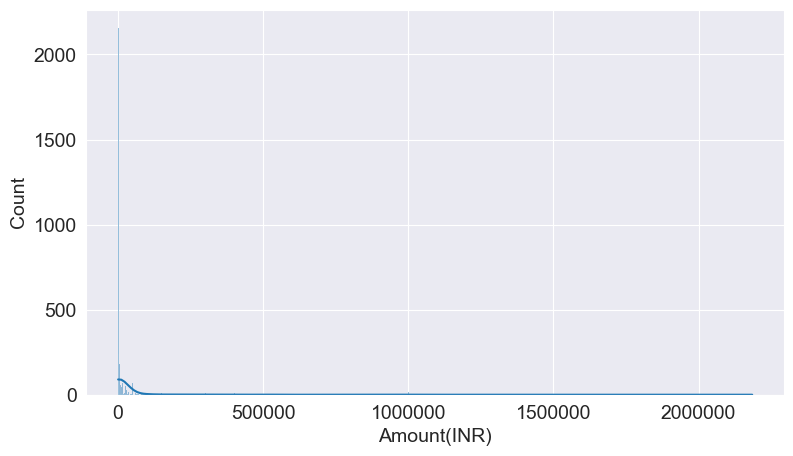

In [12]:
sns.histplot(df['Amount(INR)'],kde=True,bins=1000);

In [13]:
# As we can see the above data is highly skewed.

###  Performing Data Cleaning and Column Split 

In [14]:
## Checking for the revelant data and using them
df['Amount(INR)'].quantile(0.9)

45363.200000000084

In [15]:
df=df[df['Amount(INR)']<df['Amount(INR)'].quantile(0.90)]

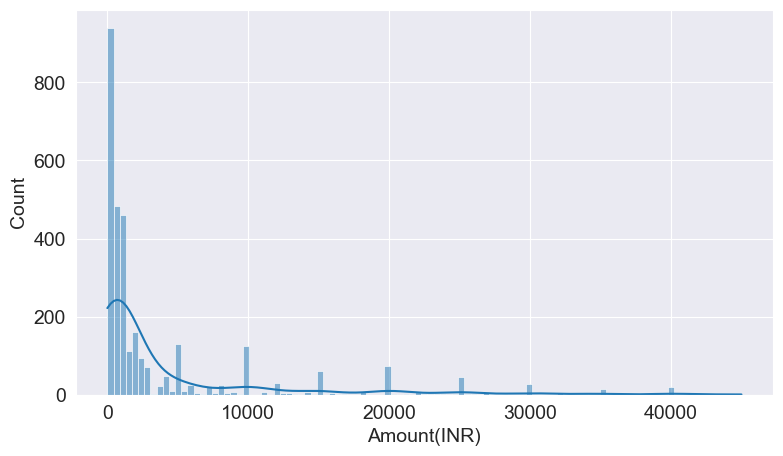

In [16]:
sns.histplot(df['Amount(INR)'],kde=True);

In [17]:
# By Visualization the above graph we can see the most of the data values have small amount of bribe. 

df.isnull().sum()

Title          0
Date           0
Location       0
Department     0
Views          0
Amount(INR)    0
dtype: int64

In [18]:
df.sample(5)

,Title,Date,Location,Department,Views,Amount(INR)
3323,I Paid Rs. 100 to Income Tax in Bankura.,2015-07-11,"Bankura,WestBengal",New PAN Card,3802,100
1901,I paid a bribe to VRO (Village Revenue Officer),2017-08-07,"Suryapet,Telangana",7/12 Extract,4699,36000
949,AR15handguard,2019-04-04,"Adilabad,Telangana",Others,2575,2200
2380,Cost of reading a Marathi page in hindi,2016-11-11,"Mumbai,Maharashtra",Change of Name in Records,4683,2000
344,Constable asked for bribe,2019-11-18,"Ramagundam,Telangana",Policies and Procedures,668,1000


In [19]:
## Exploring the Data
df.Department.unique()

array(['Births, Family and Care', 'Vehicle Insurance',
       'Driving and Transport Business', 'Driving Licenses and Tests',
       'FIR and Complaints', 'Policies and Procedures', 'Others',
       'Police Clearance Certificate', 'Registrations and Licenses',
       'Building and Housing', 'Traffic Fines, Penalties, Rules',
       'Excise', 'Property Registration', 'Loan Sanctioning',
       'Court Related', 'Verification and Certificates', 'Drugs License',
       'Visa', 'Khata', 'College Leaving Certificate', 'Tax and Permits',
       'Autorickshaws', 'Certificates', 'Caste Certificate',
       'Dates for Hearing', 'Aadhaar Card Process', 'Excess Baggage',
       'Traffic Violations', 'Bill Payment', 'Water Connection',
       'Passport Status and Delivery', 'Land Registration',
       'Government Personnel', 'Government Schemes', 'Loans',
       'Marriage Certificate and Registration', 'Police Harassment',
       'Background Verification', 'Services',
       'Change of Tariff in Do

In [20]:
# As 'Location' Column contain 'City' and 'State' information creating 2 Columns for both
df[['City','Province']]=df['Location'].str.split(',',expand=True)

In [21]:
df.head()

,Title,Date,Location,Department,Views,Amount(INR),City,Province
0,They said it is registration fee for birth cer...,2020-10-14,"Bangalore,Karnataka","Births, Family and Care",1225,400,Bangalore,Karnataka
1,Paid bribe for not having insurance during pan...,2020-10-13,"Bangalore,Karnataka",Vehicle Insurance,1158,350,Bangalore,Karnataka
2,Forced to pay bribe at KR Puram RTO,2020-10-13,"Bangalore,Karnataka",Driving and Transport Business,1249,100,Bangalore,Karnataka
3,Forced to pay 100 rupees bribe for LL test,2020-10-13,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100,Bangalore,Karnataka
4,Misusing of power and traping people in false ...,2020-10-13,"Siwan,Bihar",FIR and Complaints,1068,15000,Siwan,Bihar


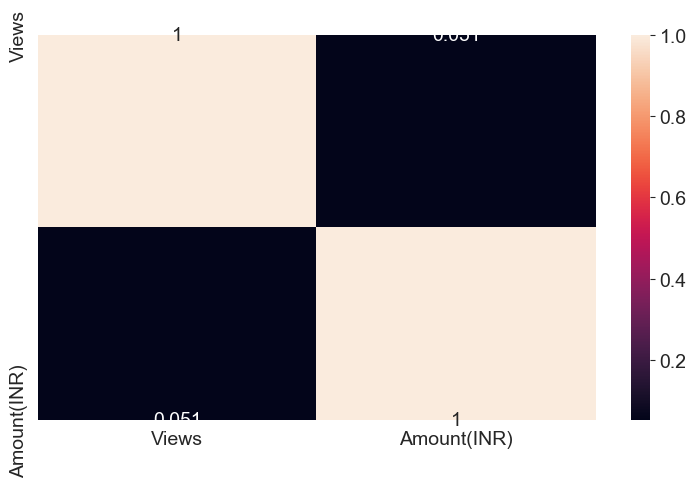

In [22]:
# Checking for Correlation
sns.heatmap(df.corr(),annot=True);

### From Given Data we can answer some questions as well 

#### 1. Name of the Cities where most Bribe were paid ?

In [23]:
most_bribe_city=df.groupby(['City'])['Amount(INR)'].agg(['count','sum']).sort_values(by='count',ascending=False).head(10)

In [24]:
most_bribe_city

,count,sum
City,,
Bangalore,720,3659321
NewDelhi,210,626320
Chennai,142,664328
Pune,117,299812
Mumbai,101,512496
Hyderabad,85,400545
Adari,60,136136
Abhayapuri,47,56358
Achhnera,45,72771


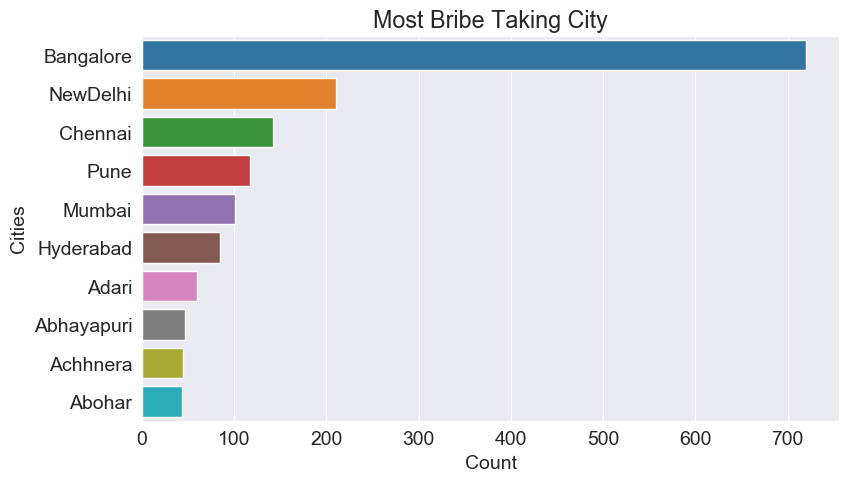

In [25]:
sns.barplot(y=most_bribe_city.index,x=most_bribe_city['count'])
plt.xlabel('Count')
plt.ylabel("Cities")
plt.title('Most Bribe Taking City');

#### 2. Name of States which given most  Bribe ?

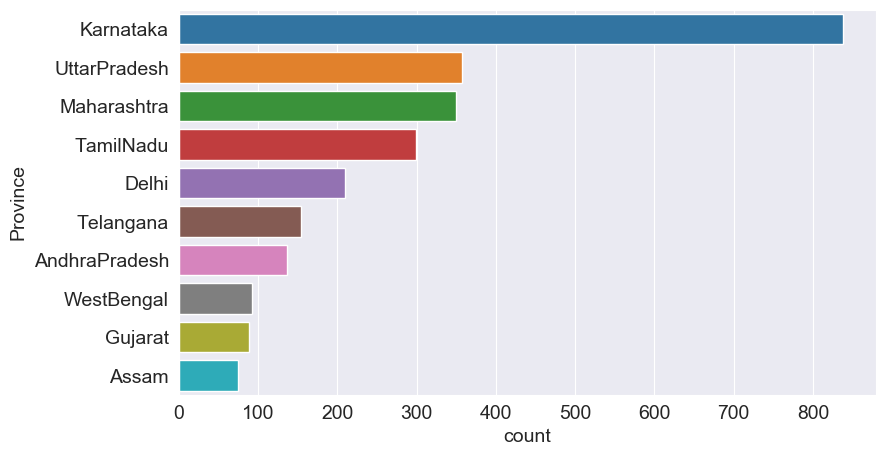

In [26]:
most_bribe_state=df.groupby(['Province'])['Amount(INR)'].agg(['count','sum']).sort_values(by='count',ascending=False).head(10)
sns.barplot(y=most_bribe_state.index,x=most_bribe_state['count']);

#### 3.Name of the Department geting paid most of the bribe ?

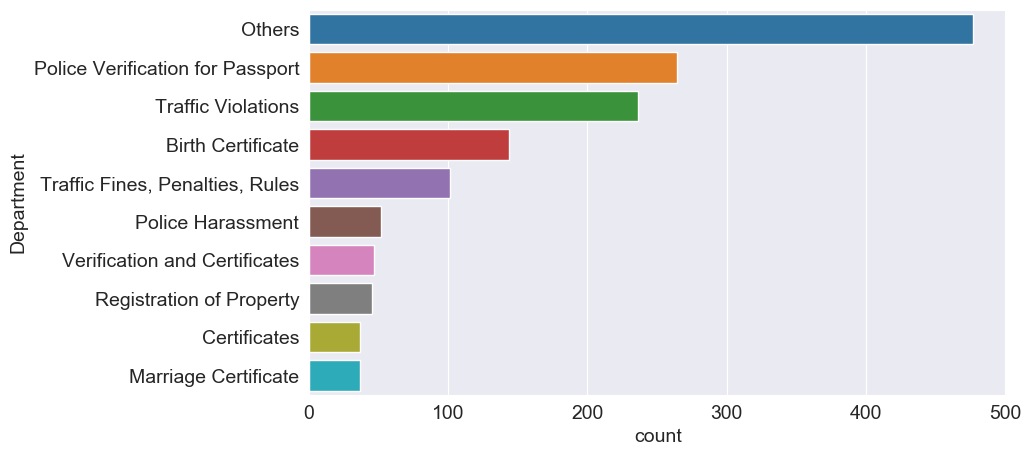

In [27]:
depart_freq=df.groupby('Department')['Amount(INR)'].agg(['count','sum']).sort_values(by='count',ascending=False).head(10)
sns.barplot(y=depart_freq.index,x=depart_freq['count']);

In [28]:
## By Visualization one can say "Police Verification" tops the list but Traffic is higher because if you. 
## Notice there are two bars of traffic.

#### 4. Departments which takes most bribe on average and overall.

In [29]:
depart_sum=df.groupby('Department')['Amount(INR)'].agg(['mean','sum']).sort_values(by='sum',ascending=False).head(10)
depart_sum

,mean,sum
Department,,
Others,3747.259958,1787443
Registration of Property,15880.000000,714600
Registration of Flat or Apartment,13812.500000,331500
Property Registration,14147.826087,325400
Police Harassment,4760.576923,247550
Police Verification for Passport,919.799242,242827
Birth Certificate,1612.583333,232212
Land Registration,9664.347826,222280
FIR and Complaints,6302.941176,214300


#### 4. Departments which takes most bribe on average and overall.

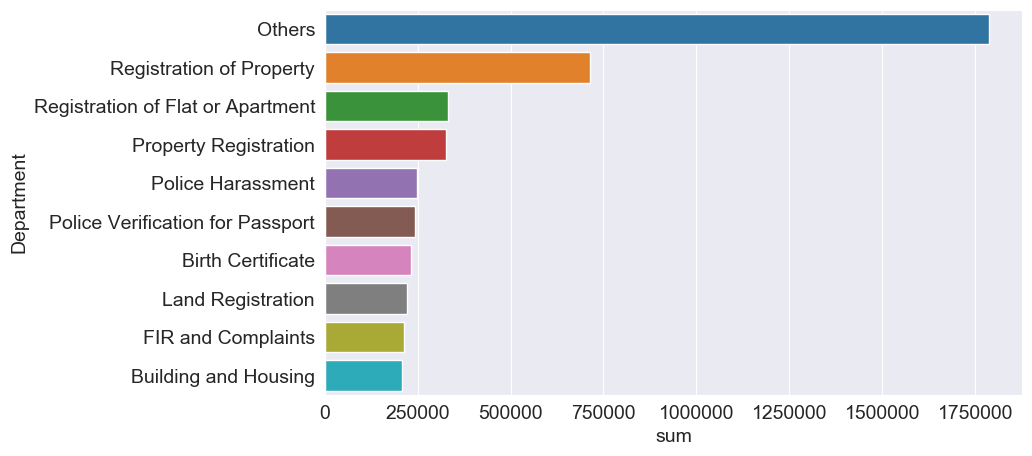

In [30]:
sns.barplot(y=depart_sum.index,x=depart_sum['sum']);

#### Applying TIME SERIES ANALYSIS 

In [31]:
df_day=df[["Amount(INR)",'Date']].copy()
df_day.head()

,Amount(INR),Date
0,400,2020-10-14
1,350,2020-10-13
2,100,2020-10-13
3,100,2020-10-13
4,15000,2020-10-13


In [32]:
## Converting the data in format of DAY , WEEK and YEAR for deeper analysis 


df_day["Days of month"]=df["Date"].dt.day
df_day["Week_of_year"]=df["Date"].dt.week
df_day["Year"]=df["Date"].dt.year
df_day["Month"]=df["Date"].dt.month
df_day['Day_of_week']=df['Date'].dt.dayofweek

In [33]:
df_day

,Amount(INR),Date,Days of month,Week_of_year,Year,Month,Day_of_week
0,400,2020-10-14,14,42,2020,10,2
1,350,2020-10-13,13,42,2020,10,1
2,100,2020-10-13,13,42,2020,10,1
3,100,2020-10-13,13,42,2020,10,1
4,15000,2020-10-13,13,42,2020,10,1
...,...,...,...,...,...,...,...
3468,33,2015-10-30,30,44,2015,10,4
3469,10,2015-10-30,30,44,2015,10,4
3470,500,2015-10-30,30,44,2015,10,4
3471,800,2015-10-30,30,44,2015,10,4


#### 5. Check which was the Day of month where bribe paid was maximum 

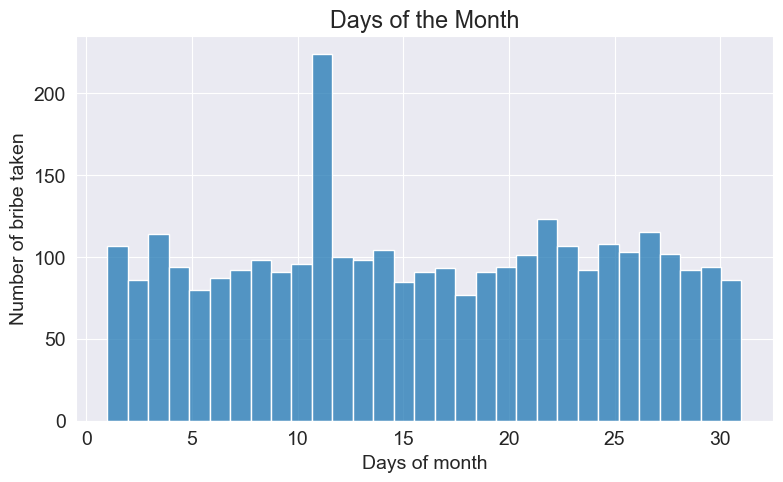

In [34]:
sns.histplot(data=df_day["Days of month"],bins=31)
plt.ylabel("Number of bribe taken")
plt.title("Days of the Month");

#### 6. What was the amount of Bribe paid by Year ?

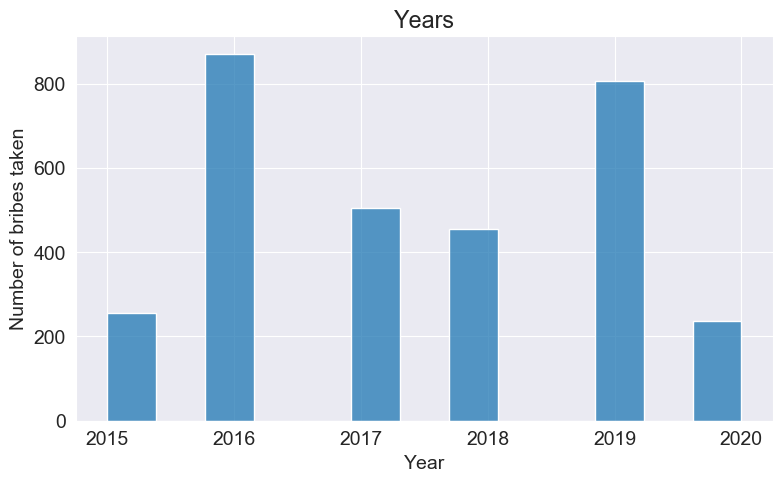

In [35]:
sns.histplot(data=df_day["Year"])
plt.ylabel("Number of bribes taken")
plt.title("Years");

#### 7.What was the amount of Bribe paid by Month ?

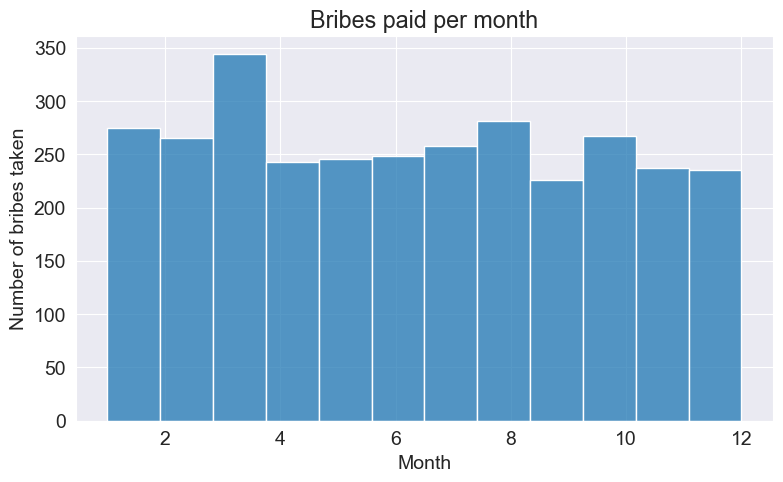

In [36]:
sns.histplot(data=df_day["Month"],bins=12)
plt.ylabel("Number of bribes taken")
plt.title("Bribes paid per month");

#### 8.Which was the day of the week where bribe taken was Lowest ?

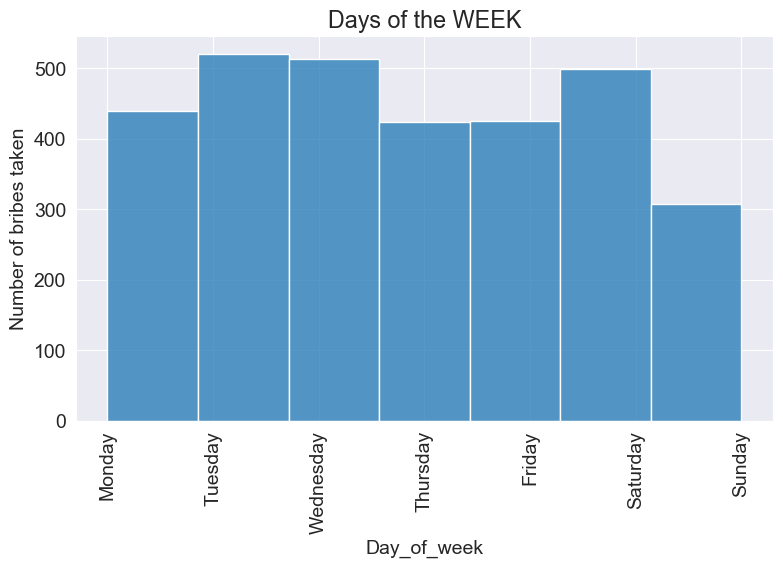

In [37]:
sns.histplot(data=df_day["Day_of_week"],bins=7)
plt.ylabel("Number of bribes taken")
plt.title("Days of the WEEK")
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],rotation=90);

### One of the funfact is that on SUNDAY the amount of bribe paid is less.

## Conclusion for the data:
    
### 1. Banglore ranks first were highest numbers of bribes are paid.

### 2. The State Karnataka is where Bribes are paid are maximum.

### 3. The Traffic Department gets has the highest bribes taking count.

### 4. Lowest number of Bribe taken on the week day is Sunday.

### 5. 2016 and 2019 where the years where most number of bribe taking cases where registered.